In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
df = pd.read_csv('archive/index_1.csv')

In [3]:
# Data wrangling
df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S') # Convert to DateTime format

# to group sales data by month and year
df['date'] = pd.to_datetime(df['date'])  # Convert date column
df['year_month'] = df['date'].dt.to_period('M')  # Creates "YYYY-MM" format

In [23]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,time,year_month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50,2024-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22,2024-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18,2024-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14,2024-03


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   object        
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   time         3636 non-null   object        
 7   year_month   3636 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), object(5), period[M](1)
memory usage: 227.4+ KB


In [25]:
df.describe()

,date,money
count,3636,3636.000000
mean,2024-09-30 11:56:02.376237568,31.746859
min,2024-03-01 00:00:00,18.120000
25%,2024-07-03 00:00:00,27.920000
50%,2024-10-06 12:00:00,32.820000
75%,2025-01-08 00:00:00,35.760000
max,2025-03-23 00:00:00,40.000000
std,NaN,4.919926


In [26]:
df.duplicated().sum()  # Count duplicate rows

0

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='date'>

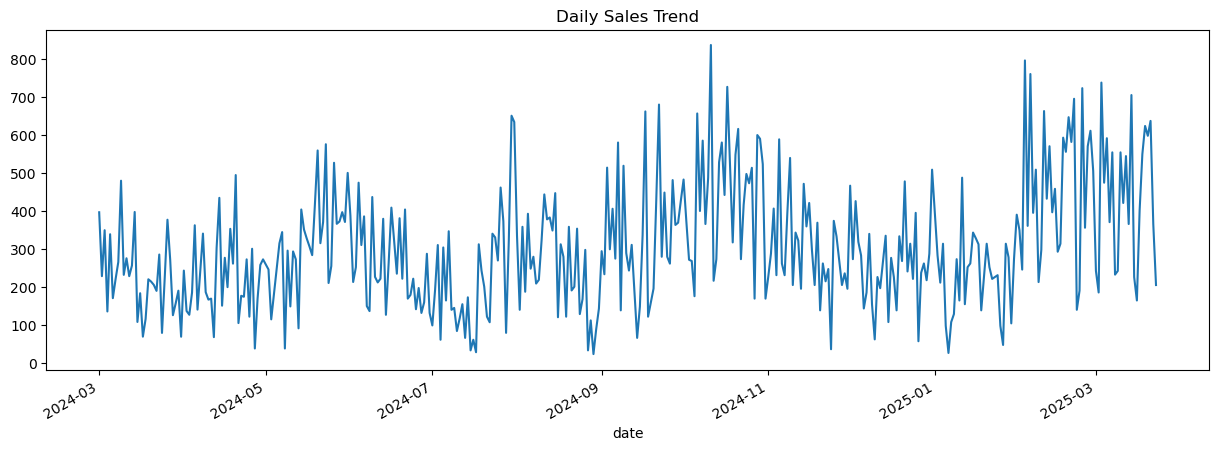

In [ ]:
# Total Sales throughout the year day by day
plt.figure(figsize=(15,5))
df.groupby('date')['money'].sum().plot(kind='line', title="Daily Sales Trend")

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='year_month'>

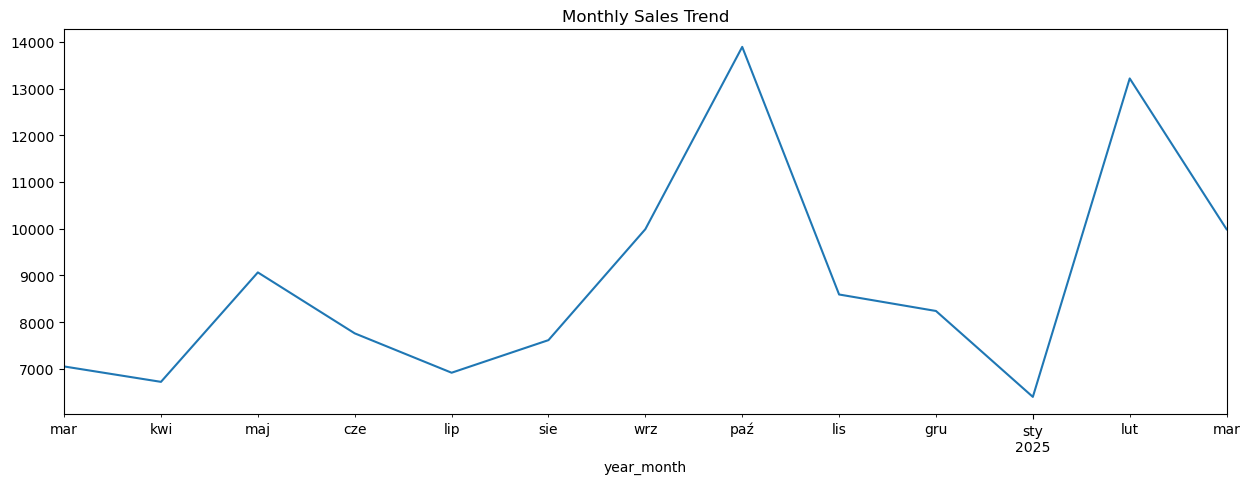

In [ ]:
# Total Sales throughout the year by months
plt.figure(figsize=(15,5))
df.groupby('year_month')['money'].sum().plot(kind='line', title="Monthly Sales Trend")

In [4]:
# grouped sales by month and year
monthly_sales = df.groupby('year_month')['money'].sum().reset_index()
print(monthly_sales)

   year_month     money
0     2024-03   7050.20
1     2024-04   6720.56
2     2024-05   9063.42
3     2024-06   7758.76
4     2024-07   6915.94
5     2024-08   7613.84
6     2024-09   9988.64
7     2024-10  13891.16
8     2024-11   8590.54
9     2024-12   8237.74
10    2025-01   6398.86
11    2025-02  13215.48
12    2025-03   9986.44


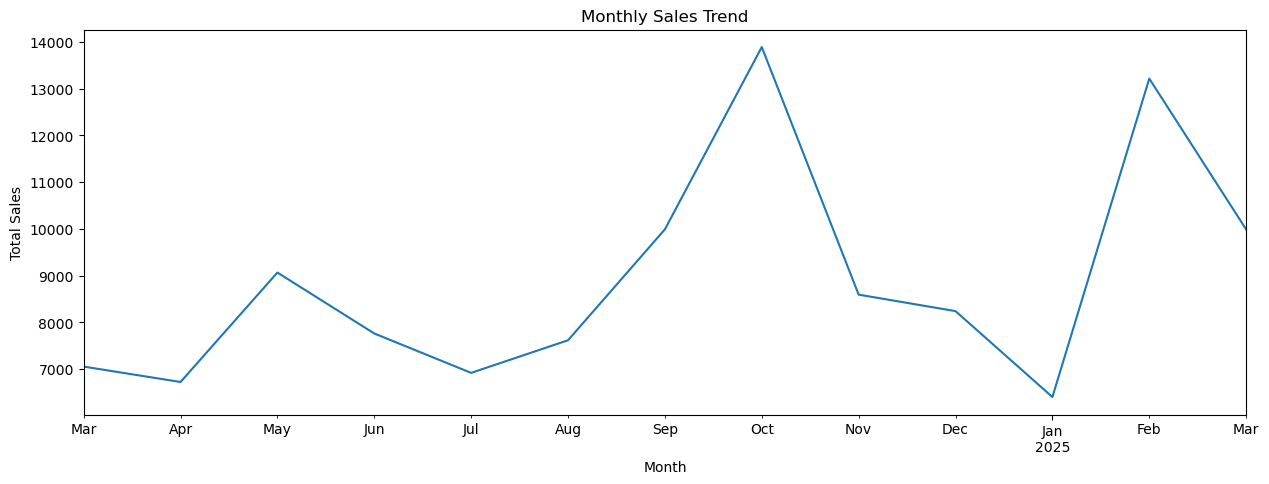

In [29]:
monthly_sales.plot(kind="line",x="year_month",  y="money", figsize=(15,5), legend=False)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(False)
plt.show()

In [ ]:
df['cash_type'].value_counts()

cash_type
card    3547
cash      89
Name: count, dtype: int64

C:\Users\MateuszSz\AppData\Local\Temp\ipykernel_12916\3757051773.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour  # Extract hour from time column


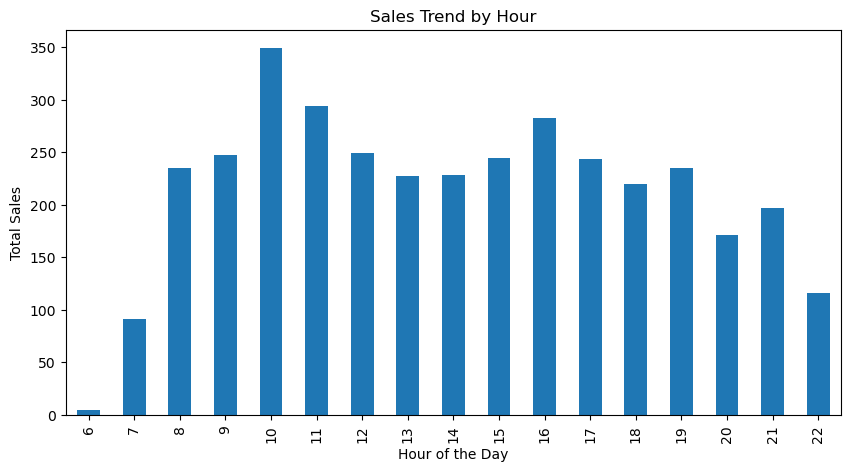

In [31]:
df['hour'] = pd.to_datetime(df['time']).dt.hour  # Extract hour from time column

hourly_sales = df.groupby('hour')['coffee_name'].count()

plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Hour")
plt.show()

In [32]:
cardcount = df['card'].value_counts()
cardcount

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0561      1
ANON-0000-0000-0562      1
ANON-0000-0000-0563      1
ANON-0000-0000-0564      1
ANON-0000-0000-1316      1
Name: count, Length: 1316, dtype: int64

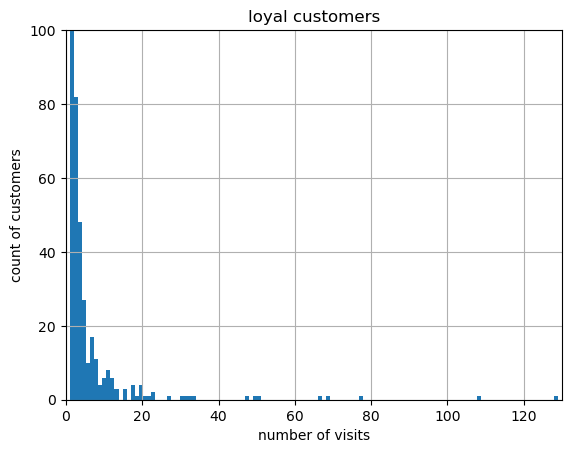

In [45]:
cardcount.hist(bins=120)
plt.xlim(0,130)
plt.ylim(0,100)
plt.xlabel("number of visits")
plt.ylabel("count of customers")
plt.title("loyal customers")
plt.show()

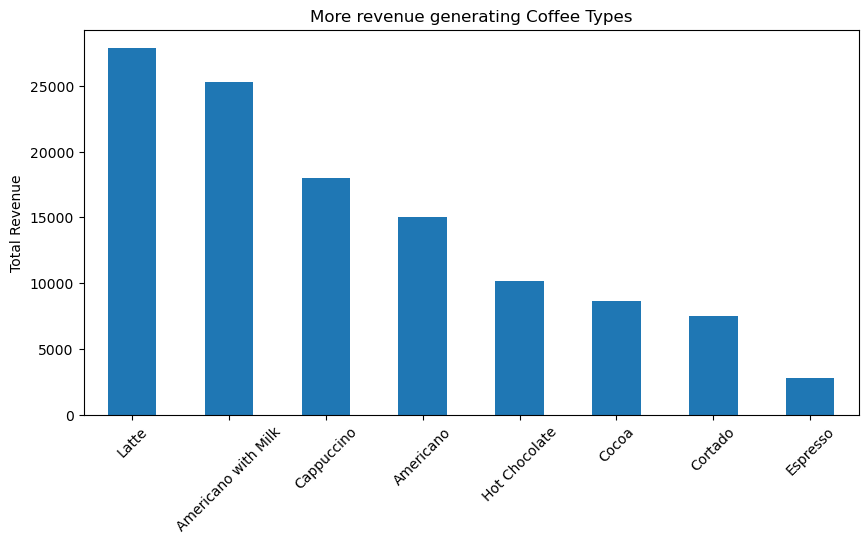

In [50]:
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coffee_sales.plot(kind='bar')
plt.xlabel("")
plt.ylabel("Total Revenue")
plt.title("More revenue generating Coffee Types")
plt.xticks(rotation=45)
plt.show()

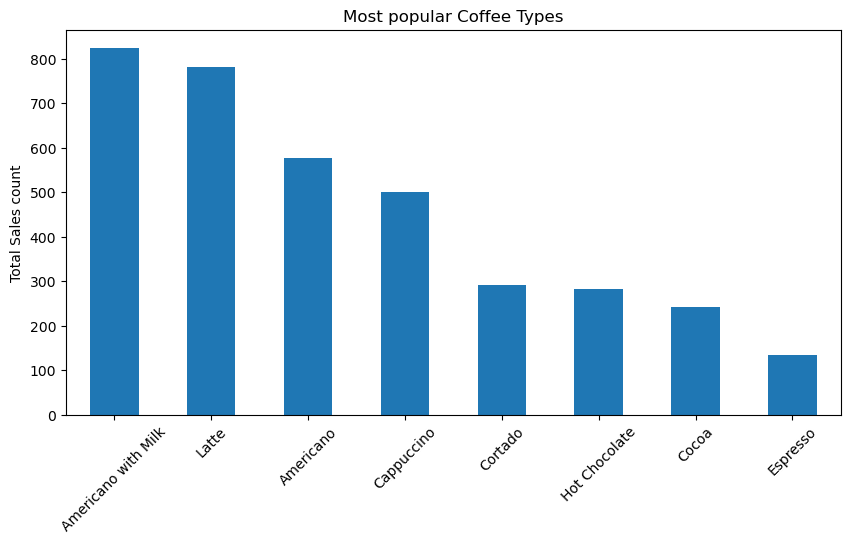

In [51]:
coffee_sales = df.groupby('coffee_name')['money'].size().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coffee_sales.plot(kind='bar')
plt.xlabel("")
plt.ylabel("Total Sales count")
plt.title("Most popular Coffee Types")
plt.xticks(rotation=45)
plt.show()

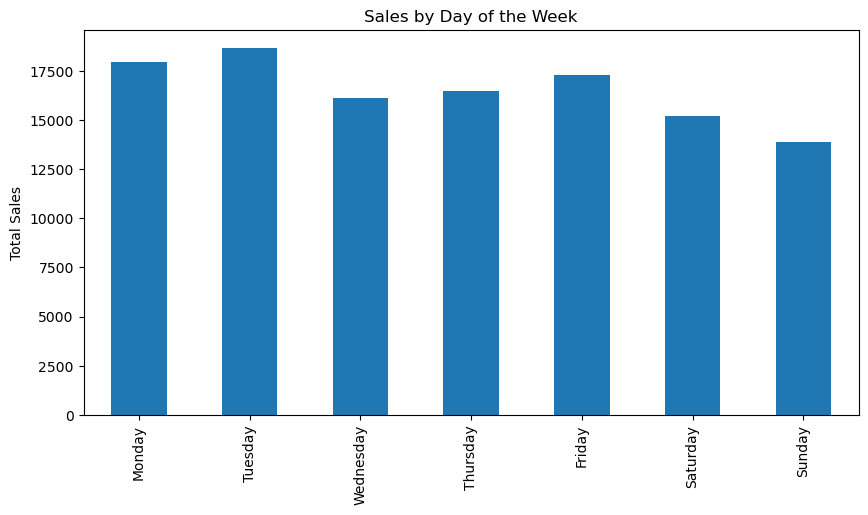

In [53]:
df['day_of_week'] = df['date'].dt.day_name()  # Extract day of the week
day_sales = df.groupby('day_of_week')['money'].sum()

day_sales = day_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10,5))
day_sales.plot(kind='bar')
plt.xlabel("")
plt.ylabel("Total Sales")
plt.title("Sales by Day of the Week")
plt.show()